# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [20]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import os

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [21]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 603


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [29]:
# Set the API base URL
base_url = "https://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{base_url}?q={city}&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | louisville
Processing Record 2 of Set 1 | adamstown
Processing Record 3 of Set 1 | tura
Processing Record 4 of Set 1 | bilibino
Processing Record 5 of Set 1 | hithadhoo
Processing Record 6 of Set 1 | weno
Processing Record 7 of Set 1 | laguna
Processing Record 8 of Set 1 | bria
Processing Record 9 of Set 1 | atafu village
Processing Record 10 of Set 1 | rongelap
Processing Record 11 of Set 1 | saint-philippe
Processing Record 12 of Set 1 | iqaluit
Processing Record 13 of Set 1 | puerto natales
Processing Record 14 of Set 1 | hoi an
Processing Record 15 of Set 1 | vorgashor
Processing Record 16 of Set 1 | olonkinbyen
Processing Record 17 of Set 1 | puerto ayora
Processing Record 18 of Set 1 | al ghayzah
Processing Record 19 of Set 1 | stanley
Processing Record 20 of Set 1 | lebu
Processing Record 21 of Set 1 | coquimbo
Processing Record 22 of Set 1 | mayqayyng
Processing Record 23 of Set 1 | anton

Processing Record 39 of Set 4 | barreirinha
Processing Record 40 of Set 4 | madang
Processing Record 41 of Set 4 | nowshahr
Processing Record 42 of Set 4 | anadyr
Processing Record 43 of Set 4 | hermanus
Processing Record 44 of Set 4 | sumbawa besar
Processing Record 45 of Set 4 | posse
Processing Record 46 of Set 4 | lawas
Processing Record 47 of Set 4 | 'ohonua
City not found. Skipping...
Processing Record 48 of Set 4 | leova
Processing Record 49 of Set 4 | acarau
Processing Record 0 of Set 5 | kourou
Processing Record 1 of Set 5 | lerwick
Processing Record 2 of Set 5 | touros
Processing Record 3 of Set 5 | 'ibri
City not found. Skipping...
Processing Record 4 of Set 5 | mejit
Processing Record 5 of Set 5 | basco
Processing Record 6 of Set 5 | qarazhal
Processing Record 7 of Set 5 | praia da vitoria
Processing Record 8 of Set 5 | talnakh
Processing Record 9 of Set 5 | snowflake
Processing Record 10 of Set 5 | zhumysker
Processing Record 11 of Set 5 | avarua
Processing Record 12 of Se

Processing Record 32 of Set 8 | bermeo
Processing Record 33 of Set 8 | nowe miasto lubawskie
Processing Record 34 of Set 8 | zhangatas
Processing Record 35 of Set 8 | esquel
Processing Record 36 of Set 8 | suntar
Processing Record 37 of Set 8 | broome
Processing Record 38 of Set 8 | monrovia
Processing Record 39 of Set 8 | odder
Processing Record 40 of Set 8 | coari
Processing Record 41 of Set 8 | taroa
Processing Record 42 of Set 8 | gusev
Processing Record 43 of Set 8 | alo
Processing Record 44 of Set 8 | kone
Processing Record 45 of Set 8 | gokwe
Processing Record 46 of Set 8 | isfana
Processing Record 47 of Set 8 | stung treng
Processing Record 48 of Set 8 | yazoo city
Processing Record 49 of Set 8 | plouzane
Processing Record 0 of Set 9 | barra de santo antonio
Processing Record 1 of Set 9 | paka
Processing Record 2 of Set 9 | ulanhot
Processing Record 3 of Set 9 | belyy yar
Processing Record 4 of Set 9 | houghton
Processing Record 5 of Set 9 | kosciuszko national park
City not fo

Processing Record 22 of Set 12 | pechora
Processing Record 23 of Set 12 | villa la angostura
Processing Record 24 of Set 12 | cat ba
City not found. Skipping...
Processing Record 25 of Set 12 | aldan
Processing Record 26 of Set 12 | keflavik
Processing Record 27 of Set 12 | karachayevsk
Processing Record 28 of Set 12 | bodo
Processing Record 29 of Set 12 | turtas
Processing Record 30 of Set 12 | mogocha
Processing Record 31 of Set 12 | oranjemund
Processing Record 32 of Set 12 | mopti
Processing Record 33 of Set 12 | kulia village
City not found. Skipping...
Processing Record 34 of Set 12 | concepcion
Processing Record 35 of Set 12 | kapiri mposhi
Processing Record 36 of Set 12 | hihifo
City not found. Skipping...
Processing Record 37 of Set 12 | utete
Processing Record 38 of Set 12 | strenci
Processing Record 39 of Set 12 | daur
Processing Record 40 of Set 12 | tolanaro
Processing Record 41 of Set 12 | ras gharib
City not found. Skipping...
Processing Record 42 of Set 12 | grantsville

In [32]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          575
Lat           575
Lng           575
Max Temp      575
Humidity      575
Cloudiness    575
Wind Speed    575
Country       575
Date          575
dtype: int64

In [33]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,louisville,38.2542,-85.7594,275.11,80,0,2.06,US,1701915953
1,adamstown,-25.0660,-130.1015,296.14,79,96,5.52,PN,1701915823
2,tura,25.5198,90.2201,290.22,92,100,0.92,IN,1701916087
3,bilibino,68.0546,166.4372,241.58,100,100,1.74,RU,1701915833
4,hithadhoo,-0.6000,73.0833,301.04,79,39,4.99,MV,1701916088


In [35]:
# Export the City_Data into a csv
city_data_df.to_csv("../downloads/cities.csv", index_label="City_ID")

In [37]:
# Read saved data
city_data_df = pd.read_csv("../downloads/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,louisville,38.2542,-85.7594,275.11,80,0,2.06,US,1701915953
1,adamstown,-25.0660,-130.1015,296.14,79,96,5.52,PN,1701915823
2,tura,25.5198,90.2201,290.22,92,100,0.92,IN,1701916087
3,bilibino,68.0546,166.4372,241.58,100,100,1.74,RU,1701915833
4,hithadhoo,-0.6000,73.0833,301.04,79,39,4.99,MV,1701916088


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

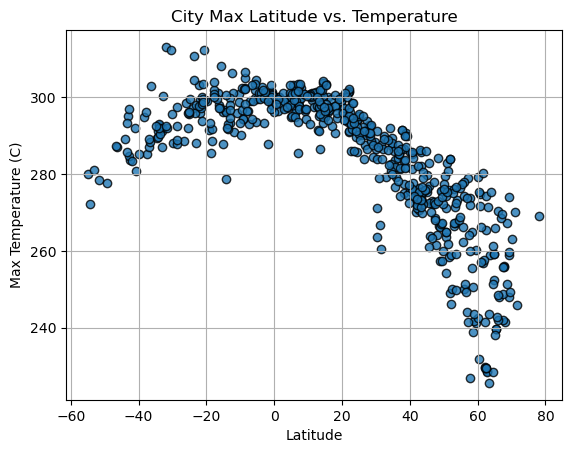

In [40]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black", marker="o", alpha=0.8)

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("../downloads/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

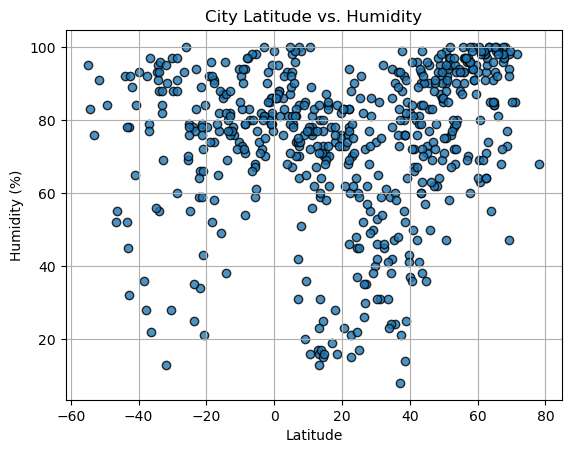

In [41]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black", marker="o", alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("../downloads/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

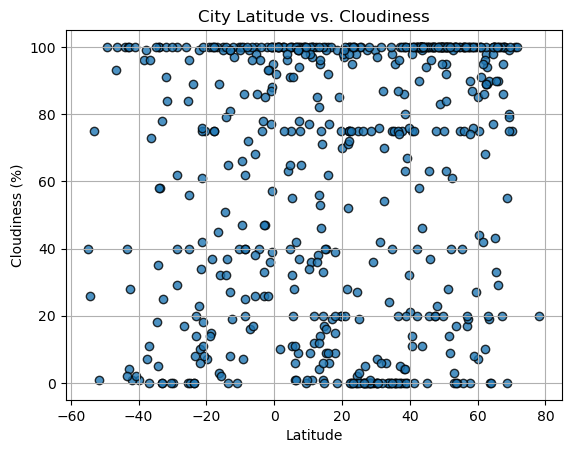

In [42]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black", marker="o", alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("../downloads/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

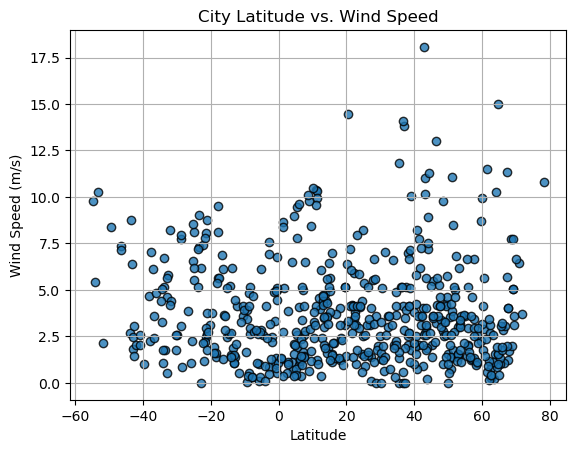

In [43]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black", marker="o", alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("../downloads/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [60]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, x_label, y_label, title):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)

    # Create a regression line
    regress_values = x_values * slope + intercept

    # Plot scatter plot
    plt.scatter(x_values, y_values, edgecolors="black", marker="o", alpha=0.8)

    # Plot regression line
    plt.plot(x_values, regress_values, "r-", label="y={:.2f}x+{:.2f}".format(slope, intercept))
    
     # Annotate with the correlation coefficient (r-value)
    plt.annotate(f"r = {r_value:.2f}", (min(x_values), max(y_values)), fontsize=12, color='blue')

    # Label plot
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    print(f"The r-value is: {r_value**2:.2f}")
    plt.legend()

    # Show plot
    plt.show()

In [61]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,louisville,38.2542,-85.7594,275.11,80,0,2.06,US,1701915953
2,tura,25.5198,90.2201,290.22,92,100,0.92,IN,1701916087
3,bilibino,68.0546,166.4372,241.58,100,100,1.74,RU,1701915833
5,weno,7.4515,151.8468,299.12,100,100,2.57,FM,1701916089
6,laguna,38.4210,-121.4238,286.43,92,100,4.12,US,1701916090


In [62]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,adamstown,-25.0660,-130.1015,296.14,79,96,5.52,PN,1701915823
4,hithadhoo,-0.6000,73.0833,301.04,79,39,4.99,MV,1701916088
8,atafu village,-8.5421,-172.5159,302.55,71,25,2.61,TK,1701916091
10,saint-philippe,-21.3585,55.7679,297.92,79,61,2.46,RE,1701916092
12,puerto natales,-51.7236,-72.4875,278.60,91,1,2.17,CL,1701916093


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.75


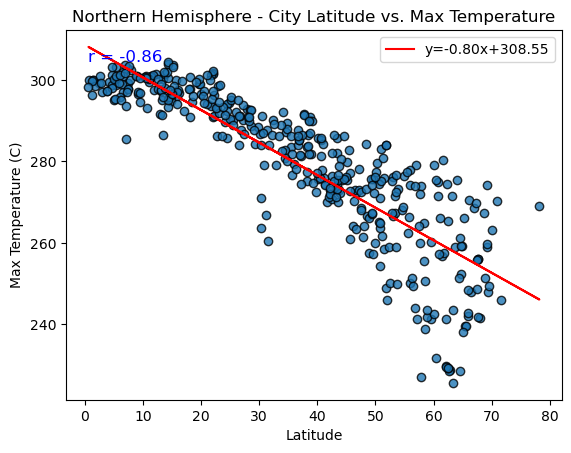

In [63]:
# Linear regression on Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], 
                       "Latitude", "Max Temperature (C)", "Northern Hemisphere - City Latitude vs. Max Temperature")


The r-value is: 0.34


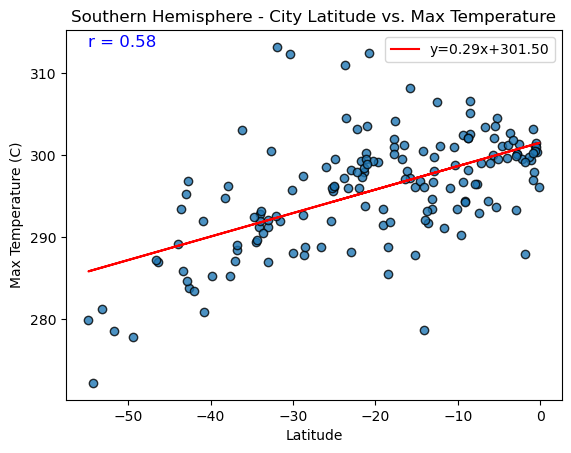

In [64]:
# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], 
                       "Latitude", "Max Temperature (C)", "Southern Hemisphere - City Latitude vs. Max Temperature")


**Discussion about the linear relationship:**  In the Northern Hemisphere, there is a robust negative correlation (indicated by the strong negative r value of -0.75) between latitude and temperature. This means that as you move closer to the North Pole (higher latitude), temperatures tend to decrease.

On the other hand, in the Southern Hemisphere, although the correlation isn't as strong as in the Northern Hemisphere (moderate positive correlation with an r value of 0.34), there is still a discernible pattern. As you approach the equator (higher latitude in the Southern Hemisphere), temperatures generally rise. The positive correlation implies that there is a tendency for higher latitudes in the Southern Hemisphere to have higher temperatures.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.10


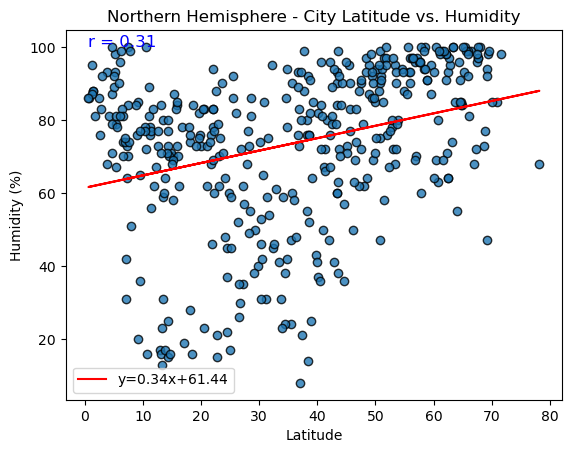

In [65]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], 
                       "Latitude", "Humidity (%)", "Northern Hemisphere - City Latitude vs. Humidity")


The r-value is: 0.02


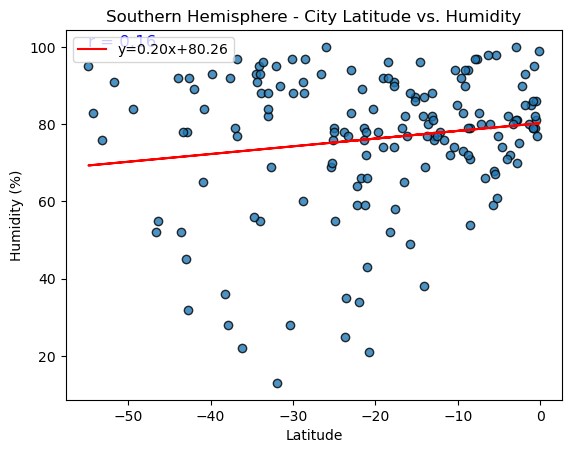

In [66]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], 
                       "Latitude", "Humidity (%)", "Southern Hemisphere - City Latitude vs. Humidity")


**Discussion about the linear relationship:** The analysis of the data for both the Northern and Southern Hemispheres reveals that there is not a strong correlation between humidity and latitude. The linear regression lines and the associated r values shows that latitude does not have a substantial impact on humidity levels in this dataset. The data suggests that variations in latitude are not a major factor in influencing humidity based on the observed values, as the correlation is not significant.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.02


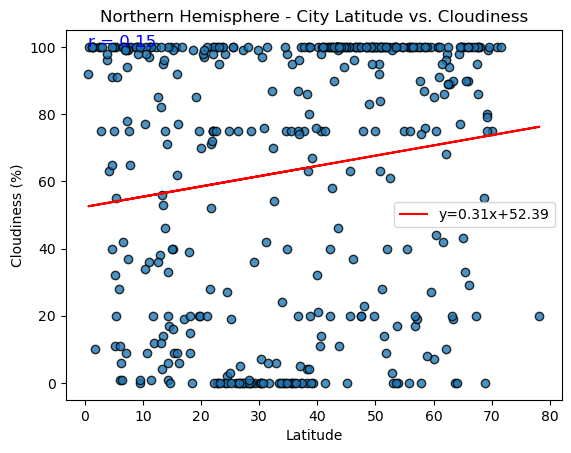

In [67]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], 
                       "Latitude", "Cloudiness (%)", "Northern Hemisphere - City Latitude vs. Cloudiness")


The r-value is: 0.03


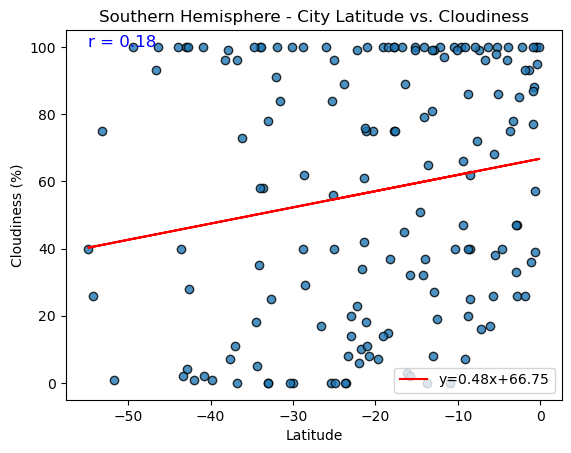

In [68]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], 
                       "Latitude", "Cloudiness (%)", "Southern Hemisphere - City Latitude vs. Cloudiness")


**Discussion about the linear relationship:** The examination of data for both the Northern and Southern Hemispheres shows that there does not seem to be a correlation between cloudiness and latitude. Latitude does not seem to play a significant role in influencing cloudiness levels based on the observed data, as there is no obvious pattern or correlation between the two variables.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.00


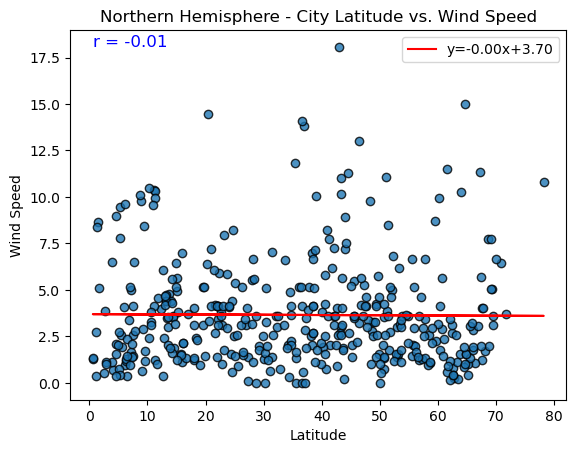

In [69]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], 
                       "Latitude", "Wind Speed", "Northern Hemisphere - City Latitude vs. Wind Speed")


The r-value is: 0.10


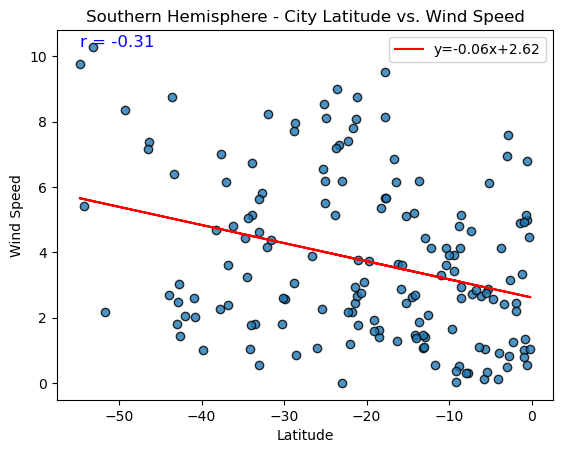

In [70]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], 
                       "Latitude", "Wind Speed", "Southern Hemisphere - City Latitude vs. Wind Speed")


**Discussion about the linear relationship:** The analysis of wind speed and latitude in the Southern Hemisphere suggests a weak negative correlation, implying that as you move towards higher latitudes (closer to the pole), there might be a tendency for lower wind speeds. However, the strength of this relationship is not substantial, as indicated by the relatively low r value of 0.10. The correlation is not strong enough to confidently assert that latitude significantly influences wind speed in the Southern Hemisphere.

In the Northern Hemisphere, the correlation is even weaker, suggesting that latitude has even less of an effect on wind speed in this region. The data does not provide strong evidence to support the idea that there is a consistent relationship between latitude and wind speed in either hemisphere. Therefore, latitude may not be a major factor in determining wind speed based on the observed values.